!pip show scikit-learn
!pip show imbalanced-learn
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1
!pip install --upgrade scikit-learn imbalanced-learn
!pip show scikit-learn
!pip show imbalanced-learn


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [2]:
labels = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS', 'Infilteration', 'SQL Injection']


Benign = 5000
Bot = 909
Brute Force -Web = 362
Brute Force -XSS = 151
Infilteration = 639
SQL Injection = 53


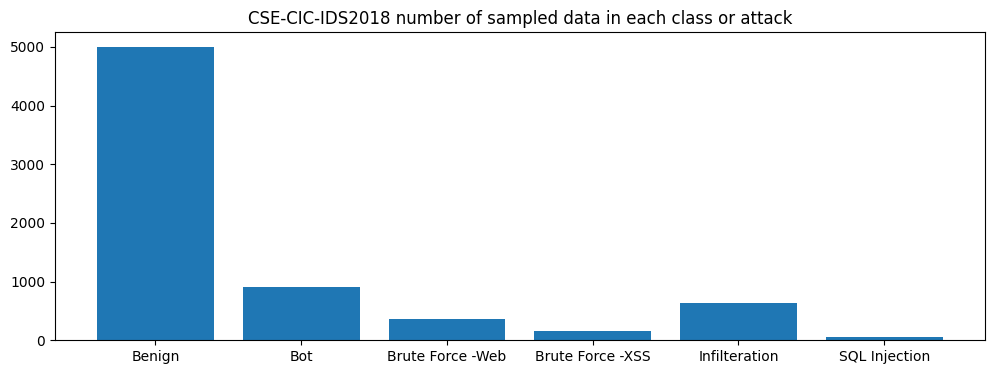

In [4]:
dataset = pd.read_csv(r"C:\Users\tnvpr\data valley projects for pragathi\Intrusion Detection Systems Using ML-Based Anomaly Detection\code\CSE-CIC-IDS2018\dataset.csv") #loading dataset
dataset.fillna(0, inplace = True)
unique, count = np.unique(dataset['Label'], return_counts=True)
for i in range(len(unique)):
    print(unique[i]+" = "+str(count[i]))
height = count
bars = unique
y_pos = np.arange(len(bars))
plt.figure(figsize=(12,4))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("CSE-CIC-IDS2018 number of sampled data in each class or attack")
plt.show()        


In [5]:
dataset.drop(['Timestamp'], axis = 1,inplace=True)
dataset.drop(['Flow Byts/s'], axis = 1,inplace=True)
dataset.drop(['Flow Pkts/s'], axis = 1,inplace=True)
le = LabelEncoder()
dataset['Label'] = pd.Series(le.fit_transform(dataset['Label'].astype(str)))
print(dataset)
print("Dataset Size: "+str(dataset.shape))


      Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0           80         6        5349549             4             4   
1           80         6             31             2             0   
2           80         6       53377612           202           109   
3           80         6           1071             3             0   
4           80         6       56908317           203           104   
...        ...       ...            ...           ...           ...   
7109        80         6       56130475           153           104   
7110        80         6            105             2             0   
7111        80         6        5011371             4             4   
7112        80         6             13             2             0   
7113        80         6       13197494            38            25   

      TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0                 365            809.0              365                

In [6]:
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]-1]
Y = dataset[:,dataset.shape[1]-1]

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

Benign = 5000
Bot = 5000
Brute Force -Web = 5000
Brute Force -XSS = 5000
Infilteration = 5000
SQL Injection = 5000


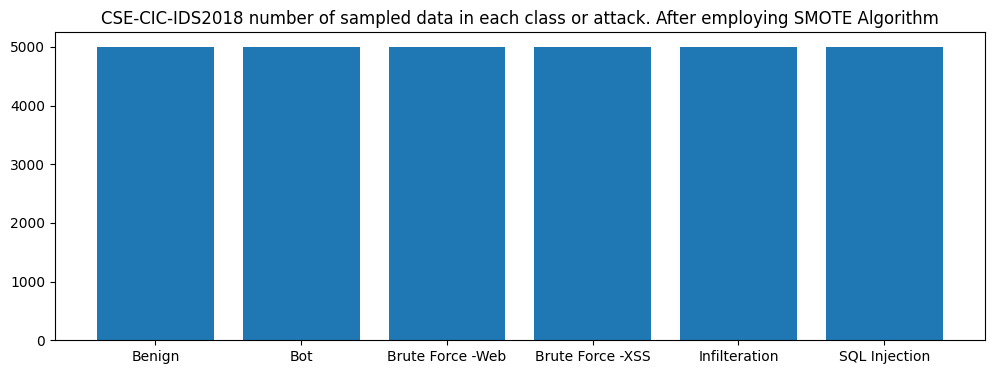

In [7]:
sm = SMOTE(random_state=42)
smote_X, smote_Y = sm.fit_resample(X, Y) #applying Smote algorithm on X and Y original dataset
smote_count = []
for i in range(0,6):
    smote_count.append(sum(smote_Y == i))
for i in range(len(labels)):
    print(labels[i]+" = "+str(smote_count[i]))    
height = smote_count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize=(12,4))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("CSE-CIC-IDS2018 number of sampled data in each class or attack. After employing SMOTE Algorithm")
plt.show()       

In [8]:
def calculateMetrics(y_test,predict):
    p = precision_score(y_test, predict,average='macro') * 100
    r = recall_score(y_test, predict,average='macro') * 100
    f = f1_score(y_test, predict,average='macro') * 100
    a = accuracy_score(y_test,predict)*100
    return p, r, f, a

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
smote_X_train, smote_X_test, smote_y_train, smote_y_test = train_test_split(smote_X, smote_Y, test_size=0.2, random_state=0)
print("Training Size: "+str(X_train.shape[0]))
print("Testing Size: "+str(X_test.shape))

Training Size: 5691
Testing Size: (1423, 76)


KNN Accuracy on Original Dataset: 89.8805340829234
KNN Precision on Original Dataset: 82.82036152711947
KNN Recall on Original Dataset: 70.37083374515878
KNN FScore on Original Dataset: 75.37944819864305

KNN Accuracy on Smote Applied Dataset: 93.23333333333333
KNN Precision on Smote Applied Dataset: 93.35377232733104
KNN Recall on Smote Applied Dataset: 93.20434993220225
KNN FScore on Smote Applied Dataset: 93.21801070831901


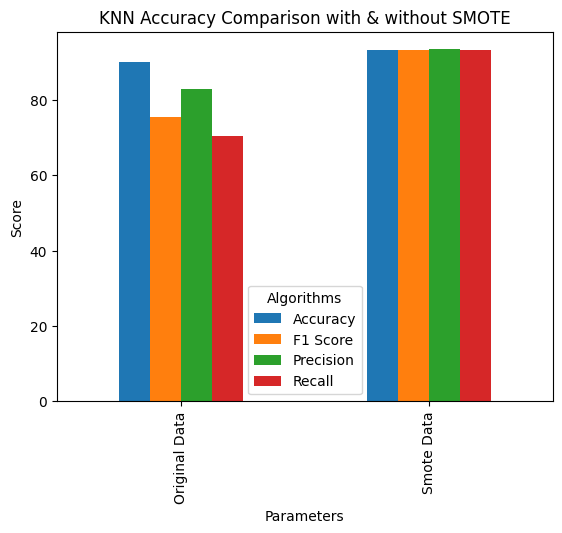

In [12]:
knn_cls = KNeighborsClassifier(n_neighbors = 6) 
knn_cls.fit(X_train, y_train)  #training KNN wihtout smote data
predict = knn_cls.predict(X_test)
original_precision, original_recall, original_fscore, original_accuracy = calculateMetrics(y_test,predict)

knn_cls = KNeighborsClassifier(n_neighbors = 6) 
knn_cls.fit(smote_X_train, smote_y_train) #training KNN with smote data
predict = knn_cls.predict(smote_X_test)
smote_precision, smote_recall, smote_fscore, smote_accuracy = calculateMetrics(smote_y_test,predict)

print("KNN Accuracy on Original Dataset: "+str(original_accuracy))
print("KNN Precision on Original Dataset: "+str(original_precision))
print("KNN Recall on Original Dataset: "+str(original_recall))
print("KNN FScore on Original Dataset: "+str(original_fscore))
print()
print("KNN Accuracy on Smote Applied Dataset: "+str(smote_accuracy))
print("KNN Precision on Smote Applied Dataset: "+str(smote_precision))
print("KNN Recall on Smote Applied Dataset: "+str(smote_recall))
print("KNN FScore on Smote Applied Dataset: "+str(smote_fscore))

df = pd.DataFrame([
    ['Original Data', 'Precision', original_precision],
    ['Original Data', 'Recall', original_recall],
    ['Original Data', 'F1 Score', original_fscore],
    ['Original Data', 'Accuracy', original_accuracy],
    ['Smote Data', 'Precision', smote_precision],
    ['Smote Data', 'Recall', smote_recall],
    ['Smote Data', 'F1 Score', smote_fscore],
    ['Smote Data', 'Accuracy', smote_accuracy],
], columns=['Parameters', 'Algorithms', 'Value'])

# Use pivot_table instead of pivot
df.pivot_table(index='Parameters', columns='Algorithms', values='Value').plot(kind='bar')
plt.title("KNN Accuracy Comparison with & without SMOTE")
plt.ylabel("Score")
plt.show()

Random Forest Accuracy on Original Dataset: 91.84820801124386
Random Forest Precision on Original Dataset: 85.30518485196849
Random Forest Recall on Original Dataset: 74.36085120771433
Random Forest FScore on Original Dataset: 79.02187978840759

Random Forest Accuracy on Smote Applied Dataset: 95.89999999999999
Random Forest Precision on Smote Applied Dataset: 96.0519763566682
Random Forest Recall on Smote Applied Dataset: 95.9147839717291
Random Forest FScore on Smote Applied Dataset: 95.93653239939434


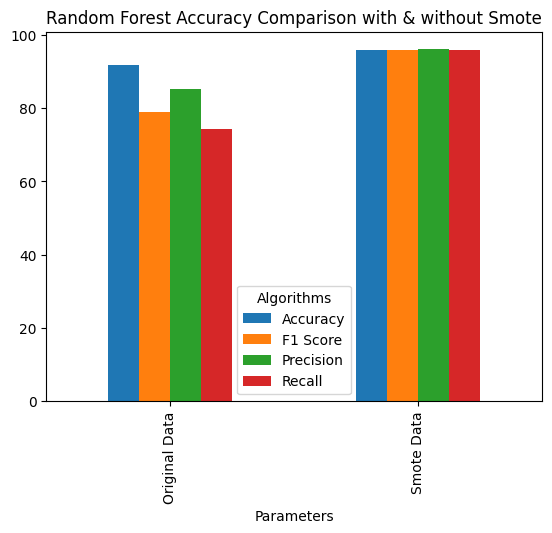

In [13]:
rf = RandomForestClassifier(n_estimators=2, criterion="entropy", max_features="sqrt")
rf.fit(X_train, y_train)
predict = rf.predict(X_test)
original_precision, original_recall, original_fscore, original_accuracy = calculateMetrics(y_test, predict)

rf = RandomForestClassifier(n_estimators=2, criterion="entropy", max_features="sqrt")
rf.fit(smote_X_train, smote_y_train)
predict = rf.predict(smote_X_test)
smote_precision, smote_recall, smote_fscore, smote_accuracy = calculateMetrics(smote_y_test, predict)

print("Random Forest Accuracy on Original Dataset: " + str(original_accuracy))
print("Random Forest Precision on Original Dataset: " + str(original_precision))
print("Random Forest Recall on Original Dataset: " + str(original_recall))
print("Random Forest FScore on Original Dataset: " + str(original_fscore))
print()
print("Random Forest Accuracy on Smote Applied Dataset: " + str(smote_accuracy))
print("Random Forest Precision on Smote Applied Dataset: " + str(smote_precision))
print("Random Forest Recall on Smote Applied Dataset: " + str(smote_recall))
print("Random Forest FScore on Smote Applied Dataset: " + str(smote_fscore))

df = pd.DataFrame(
    [
        ['Original Data', 'Precision', original_precision],
        ['Original Data', 'Recall', original_recall],
        ['Original Data', 'F1 Score', original_fscore],
        ['Original Data', 'Accuracy', original_accuracy],
        ['Smote Data', 'Precision', smote_precision],
        ['Smote Data', 'Recall', smote_recall],
        ['Smote Data', 'F1 Score', smote_fscore],
        ['Smote Data', 'Accuracy', smote_accuracy],
    ],
    columns=['Parameters', 'Algorithms', 'Value'],
)

# Corrected pivot and plot
df.pivot(index="Parameters", columns="Algorithms", values="Value").plot(kind='bar')
plt.title("Random Forest Accuracy Comparison with & without Smote")
plt.show()


C:\Users\tnvpr\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Accuracy on Original Dataset: 81.86929023190443
Decision Tree Precision on Original Dataset: 67.38040213174182
Decision Tree Recall on Original Dataset: 46.39941357659043
Decision Tree FScore on Original Dataset: 49.239565847894376

Decision Tree Accuracy on Smote Applied Dataset: 95.3
Decision Tree Precision on Smote Applied Dataset: 95.32488389538688
Decision Tree Recall on Smote Applied Dataset: 95.29718260623247
Decision Tree FScore on Smote Applied Dataset: 95.30542792287888


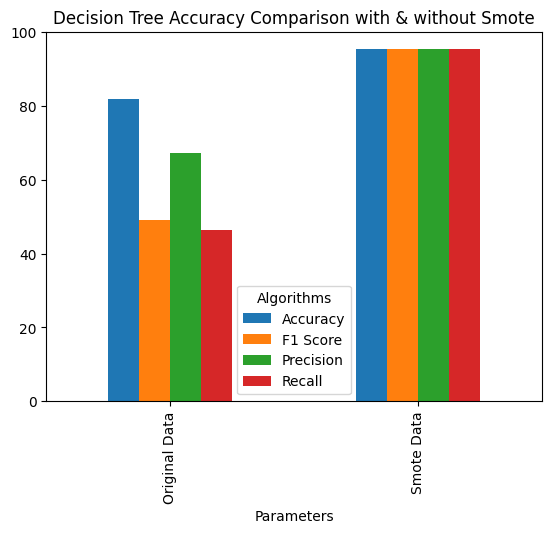

In [14]:
dt = DecisionTreeClassifier(max_depth=5, criterion="entropy", max_features="sqrt")
dt.fit(X_train, y_train)
predict = dt.predict(X_test)
original_precision, original_recall, original_fscore, original_accuracy = calculateMetrics(y_test, predict)

dt = DecisionTreeClassifier(max_depth=15, criterion="entropy", max_features="sqrt")
dt.fit(smote_X_train, smote_y_train)
predict = dt.predict(smote_X_test)
smote_precision, smote_recall, smote_fscore, smote_accuracy = calculateMetrics(smote_y_test, predict)

print("Decision Tree Accuracy on Original Dataset: " + str(original_accuracy))
print("Decision Tree Precision on Original Dataset: " + str(original_precision))
print("Decision Tree Recall on Original Dataset: " + str(original_recall))
print("Decision Tree FScore on Original Dataset: " + str(original_fscore))
print()
print("Decision Tree Accuracy on Smote Applied Dataset: " + str(smote_accuracy))
print("Decision Tree Precision on Smote Applied Dataset: " + str(smote_precision))
print("Decision Tree Recall on Smote Applied Dataset: " + str(smote_recall))
print("Decision Tree FScore on Smote Applied Dataset: " + str(smote_fscore))

df = pd.DataFrame(
    [
        ['Original Data', 'Precision', original_precision],
        ['Original Data', 'Recall', original_recall],
        ['Original Data', 'F1 Score', original_fscore],
        ['Original Data', 'Accuracy', original_accuracy],
        ['Smote Data', 'Precision', smote_precision],
        ['Smote Data', 'Recall', smote_recall],
        ['Smote Data', 'F1 Score', smote_fscore],
        ['Smote Data', 'Accuracy', smote_accuracy],
    ],
    columns=['Parameters', 'Algorithms', 'Value'],
)

# Corrected pivot and plot
df.pivot(index="Parameters", columns="Algorithms", values="Value").plot(kind='bar')
plt.title("Decision Tree Accuracy Comparison with & without Smote")
plt.show()


AdaBoost Accuracy on Original Dataset: 42.93745607870696
AdaBoost Precision on Original Dataset: 62.10101079528001
AdaBoost Recall on Original Dataset: 53.98586288415244
AdaBoost FScore on Original Dataset: 51.12209535448354

AdaBoost Accuracy on Smote Applied Dataset: 57.06666666666666
AdaBoost Precision on Smote Applied Dataset: 67.20391706667682
AdaBoost Recall on Smote Applied Dataset: 57.050030285371
AdaBoost FScore on Smote Applied Dataset: 58.80472854095038


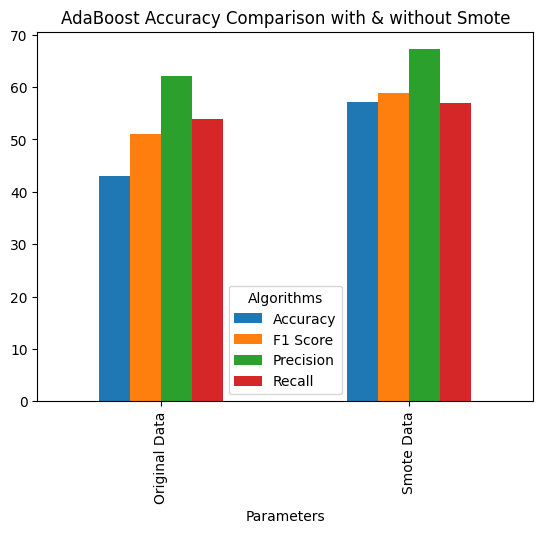

In [15]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
predict = ada.predict(X_test)
original_precision, original_recall, original_fscore, original_accuracy = calculateMetrics(y_test, predict)

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(smote_X_train, smote_y_train)
predict = ada.predict(smote_X_test)
smote_precision, smote_recall, smote_fscore, smote_accuracy = calculateMetrics(smote_y_test, predict)

print("AdaBoost Accuracy on Original Dataset: " + str(original_accuracy))
print("AdaBoost Precision on Original Dataset: " + str(original_precision))
print("AdaBoost Recall on Original Dataset: " + str(original_recall))
print("AdaBoost FScore on Original Dataset: " + str(original_fscore))
print()
print("AdaBoost Accuracy on Smote Applied Dataset: " + str(smote_accuracy))
print("AdaBoost Precision on Smote Applied Dataset: " + str(smote_precision))
print("AdaBoost Recall on Smote Applied Dataset: " + str(smote_recall))
print("AdaBoost FScore on Smote Applied Dataset: " + str(smote_fscore))

df = pd.DataFrame(
    [
        ['Original Data', 'Precision', original_precision],
        ['Original Data', 'Recall', original_recall],
        ['Original Data', 'F1 Score', original_fscore],
        ['Original Data', 'Accuracy', original_accuracy],
        ['Smote Data', 'Precision', smote_precision],
        ['Smote Data', 'Recall', smote_recall],
        ['Smote Data', 'F1 Score', smote_fscore],
        ['Smote Data', 'Accuracy', smote_accuracy],
    ],
    columns=['Parameters', 'Algorithms', 'Value'],
)

# Corrected pivot and plot
df.pivot(index="Parameters", columns="Algorithms", values="Value").plot(kind='bar')
plt.title("AdaBoost Accuracy Comparison with & without Smote")
plt.show()


Gradient Boosting Accuracy on Original Dataset: 94.72944483485594
Gradient Boosting Precision on Original Dataset: 92.36704062488033
Gradient Boosting Recall on Original Dataset: 84.93510607723341
Gradient Boosting FScore on Original Dataset: 88.07896874091087

Gradient Boosting Accuracy on Smote Applied Dataset: 96.2
Gradient Boosting Precision on Smote Applied Dataset: 96.30272232470011
Gradient Boosting Recall on Smote Applied Dataset: 96.177604071837
Gradient Boosting FScore on Smote Applied Dataset: 96.19975725972694


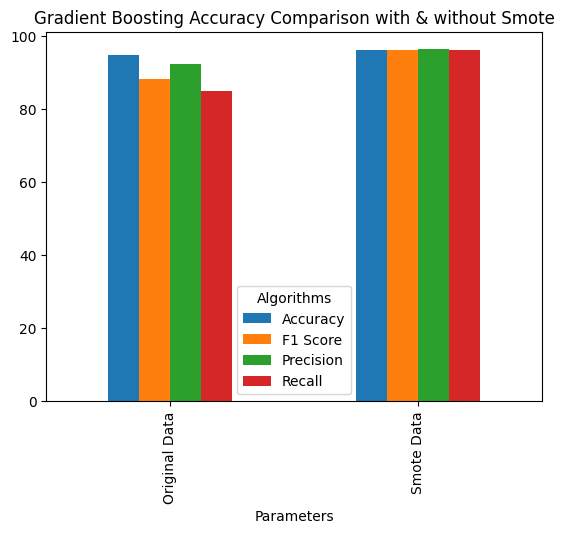

In [16]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
predict = gb.predict(X_test)
original_precision, original_recall, original_fscore, original_accuracy = calculateMetrics(y_test, predict)

gb = GradientBoostingClassifier()
gb.fit(smote_X_train, smote_y_train)
predict = gb.predict(smote_X_test)
smote_precision, smote_recall, smote_fscore, smote_accuracy = calculateMetrics(smote_y_test, predict)

print("Gradient Boosting Accuracy on Original Dataset: " + str(original_accuracy))
print("Gradient Boosting Precision on Original Dataset: " + str(original_precision))
print("Gradient Boosting Recall on Original Dataset: " + str(original_recall))
print("Gradient Boosting FScore on Original Dataset: " + str(original_fscore))
print()
print("Gradient Boosting Accuracy on Smote Applied Dataset: " + str(smote_accuracy))
print("Gradient Boosting Precision on Smote Applied Dataset: " + str(smote_precision))
print("Gradient Boosting Recall on Smote Applied Dataset: " + str(smote_recall))
print("Gradient Boosting FScore on Smote Applied Dataset: " + str(smote_fscore))

# Create a DataFrame for the metrics
df = pd.DataFrame(
    [
        ['Original Data', 'Precision', original_precision],
        ['Original Data', 'Recall', original_recall],
        ['Original Data', 'F1 Score', original_fscore],
        ['Original Data', 'Accuracy', original_accuracy],
        ['Smote Data', 'Precision', smote_precision],
        ['Smote Data', 'Recall', smote_recall],
        ['Smote Data', 'F1 Score', smote_fscore],
        ['Smote Data', 'Accuracy', smote_accuracy],
    ],
    columns=['Parameters', 'Algorithms', 'Value'],
)

# Corrected pivot and plot
df.pivot(index="Parameters", columns="Algorithms", values="Value").plot(kind='bar')
plt.title("Gradient Boosting Accuracy Comparison with & without Smote")
plt.show()

LDA Accuracy on Original Dataset: 81.86929023190443
LDA Precision on Original Dataset: 77.38159364470796
LDA Recall on Original Dataset: 56.308700191523556
LDA FScore on Original Dataset: 59.718904995457954

LDA Accuracy on Smote Applied Dataset: 72.5
LDA Precision on Smote Applied Dataset: 76.47620554103177
LDA Recall on Smote Applied Dataset: 72.52952548253081
LDA FScore on Smote Applied Dataset: 72.45165563774493


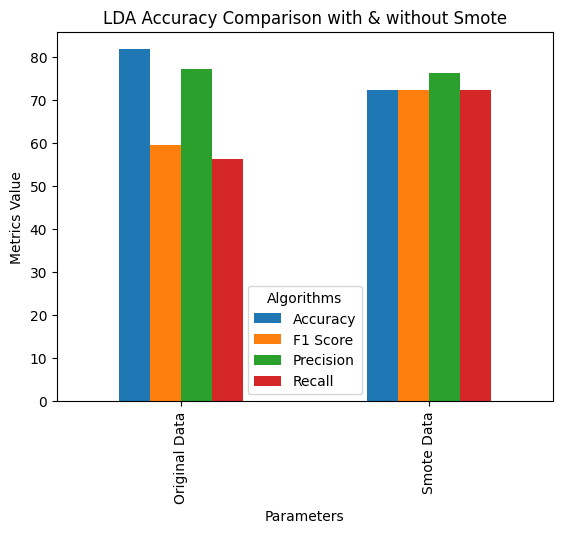

In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predict = lda.predict(X_test)
original_precision, original_recall, original_fscore, original_accuracy = calculateMetrics(y_test, predict)

lda = LinearDiscriminantAnalysis()
lda.fit(smote_X_train, smote_y_train)
predict = lda.predict(smote_X_test)
smote_precision, smote_recall, smote_fscore, smote_accuracy = calculateMetrics(smote_y_test, predict)

print("LDA Accuracy on Original Dataset: " + str(original_accuracy))
print("LDA Precision on Original Dataset: " + str(original_precision))
print("LDA Recall on Original Dataset: " + str(original_recall))
print("LDA FScore on Original Dataset: " + str(original_fscore))
print()
print("LDA Accuracy on Smote Applied Dataset: " + str(smote_accuracy))
print("LDA Precision on Smote Applied Dataset: " + str(smote_precision))
print("LDA Recall on Smote Applied Dataset: " + str(smote_recall))
print("LDA FScore on Smote Applied Dataset: " + str(smote_fscore))

# Create a DataFrame for the metrics
df = pd.DataFrame(
    [
        ['Original Data', 'Precision', original_precision],
        ['Original Data', 'Recall', original_recall],
        ['Original Data', 'F1 Score', original_fscore],
        ['Original Data', 'Accuracy', original_accuracy],
        ['Smote Data', 'Precision', smote_precision],
        ['Smote Data', 'Recall', smote_recall],
        ['Smote Data', 'F1 Score', smote_fscore],
        ['Smote Data', 'Accuracy', smote_accuracy],
    ],
    columns=['Parameters', 'Algorithms', 'Value'],
)

# Corrected pivot and plot
df.pivot(index="Parameters", columns="Algorithms", values="Value").plot(kind='bar')
plt.title("LDA Accuracy Comparison with & without Smote")
plt.ylabel("Metrics Value")
plt.show()
